<a href="https://github.com/ebm7pc/ia4eng_project/blob/838e8394d9a8c1fdfb04670350eac13945d96fda/01%20-%20exploracion%20y%20limpieza%20de%20datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

In [11]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()
init.endpoint

'https://m5knaekxo6.execute-api.us-west-2.amazonaws.com/dev-v0001/rlxmooc'

In [12]:
### Instalación y carga del componente para llamar datos existentes en el sitio kaggle -------------------------------###
### En este punto se solicita la carga del archivo kaggle.json el cual contiene las credenciales de usuario del sitio ###
### kaggle.json se puede obtener desde el sitio de kaggle desde las configuraciones de usuario -----------------------###
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"eduardobedoyamarin","key":"c5e22e55c7828572ad66be14edff8dd3"}'}

In [13]:
### Se copia el archivo kaggle.json en la ubicación adecuada para su correcto funcionamiento ###
!cp kaggle.json ~/.kaggle/

In [14]:
### Se hace uso del comando para descargar el conjunto de datos con que cual se trabajará --------###
### Este se descargará en un archivo comprimido el cual se tendrá que descomprimir posteriormente ###
!kaggle datasets download -d gregorut/videogamesales

videogamesales.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
### Descompresión del archivo que contiene el conjunto de datos ###
!unzip /content/videogamesales.zip

Archive:  /content/videogamesales.zip
replace vgsales.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: vgsales.csv             


In [26]:
### Importe de librerías y primer vistazo al dataset que descargó y se descomprimió anteriormente ###
#!wc vgsales.csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('vgsales.csv')
print("Tamaño: ", df.shape)
df.head(5)

Tamaño:  (16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [27]:
### Asignación como índice de la columna que contiene el nombre del videojuego y eliminación de dicha columna después de  ser asignada como tal ###
df.index = df.Name
del(df["Name"])
df.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,,,,
Wii Sports,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
Super Mario Bros.,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
Mario Kart Wii,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
Wii Sports Resort,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
Pokemon Red/Pokemon Blue,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [28]:
### Visualización de los tipos de datos de cada columna ###
for c in df.columns:
    print ("%15a"%c, df[c].dtype)

         'Rank' int64
     'Platform' object
         'Year' float64
        'Genre' object
    'Publisher' object
     'NA_Sales' float64
     'EU_Sales' float64
     'JP_Sales' float64
  'Other_Sales' float64
 'Global_Sales' float64


### **En este punto se hace notable y pertinente convetir el tipo de dato de la columna "Year" a un tipo entero.**

In [32]:
### Visualización de valores faltantes ###
missing = df.isna().sum()
print(missing, '\n')
print(missing[missing!=0])

Rank              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64 

Year         271
Publisher     58
dtype: int64


### **Se observa que faltan datos en la columna "Year" y en la columna "Publiser"**

In [33]:
### Visualizando características de datos numéricos ###
df._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [44]:
### Visualizando nombres de columnas y sus tipos de datos ###
print(df.columns, '\n')
print(df._get_numeric_data().columns, '\n')
print(df.select_dtypes(['object']).columns)

Index(['Rank', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object') 

Index(['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object') 

Index(['Platform', 'Genre', 'Publisher'], dtype='object')


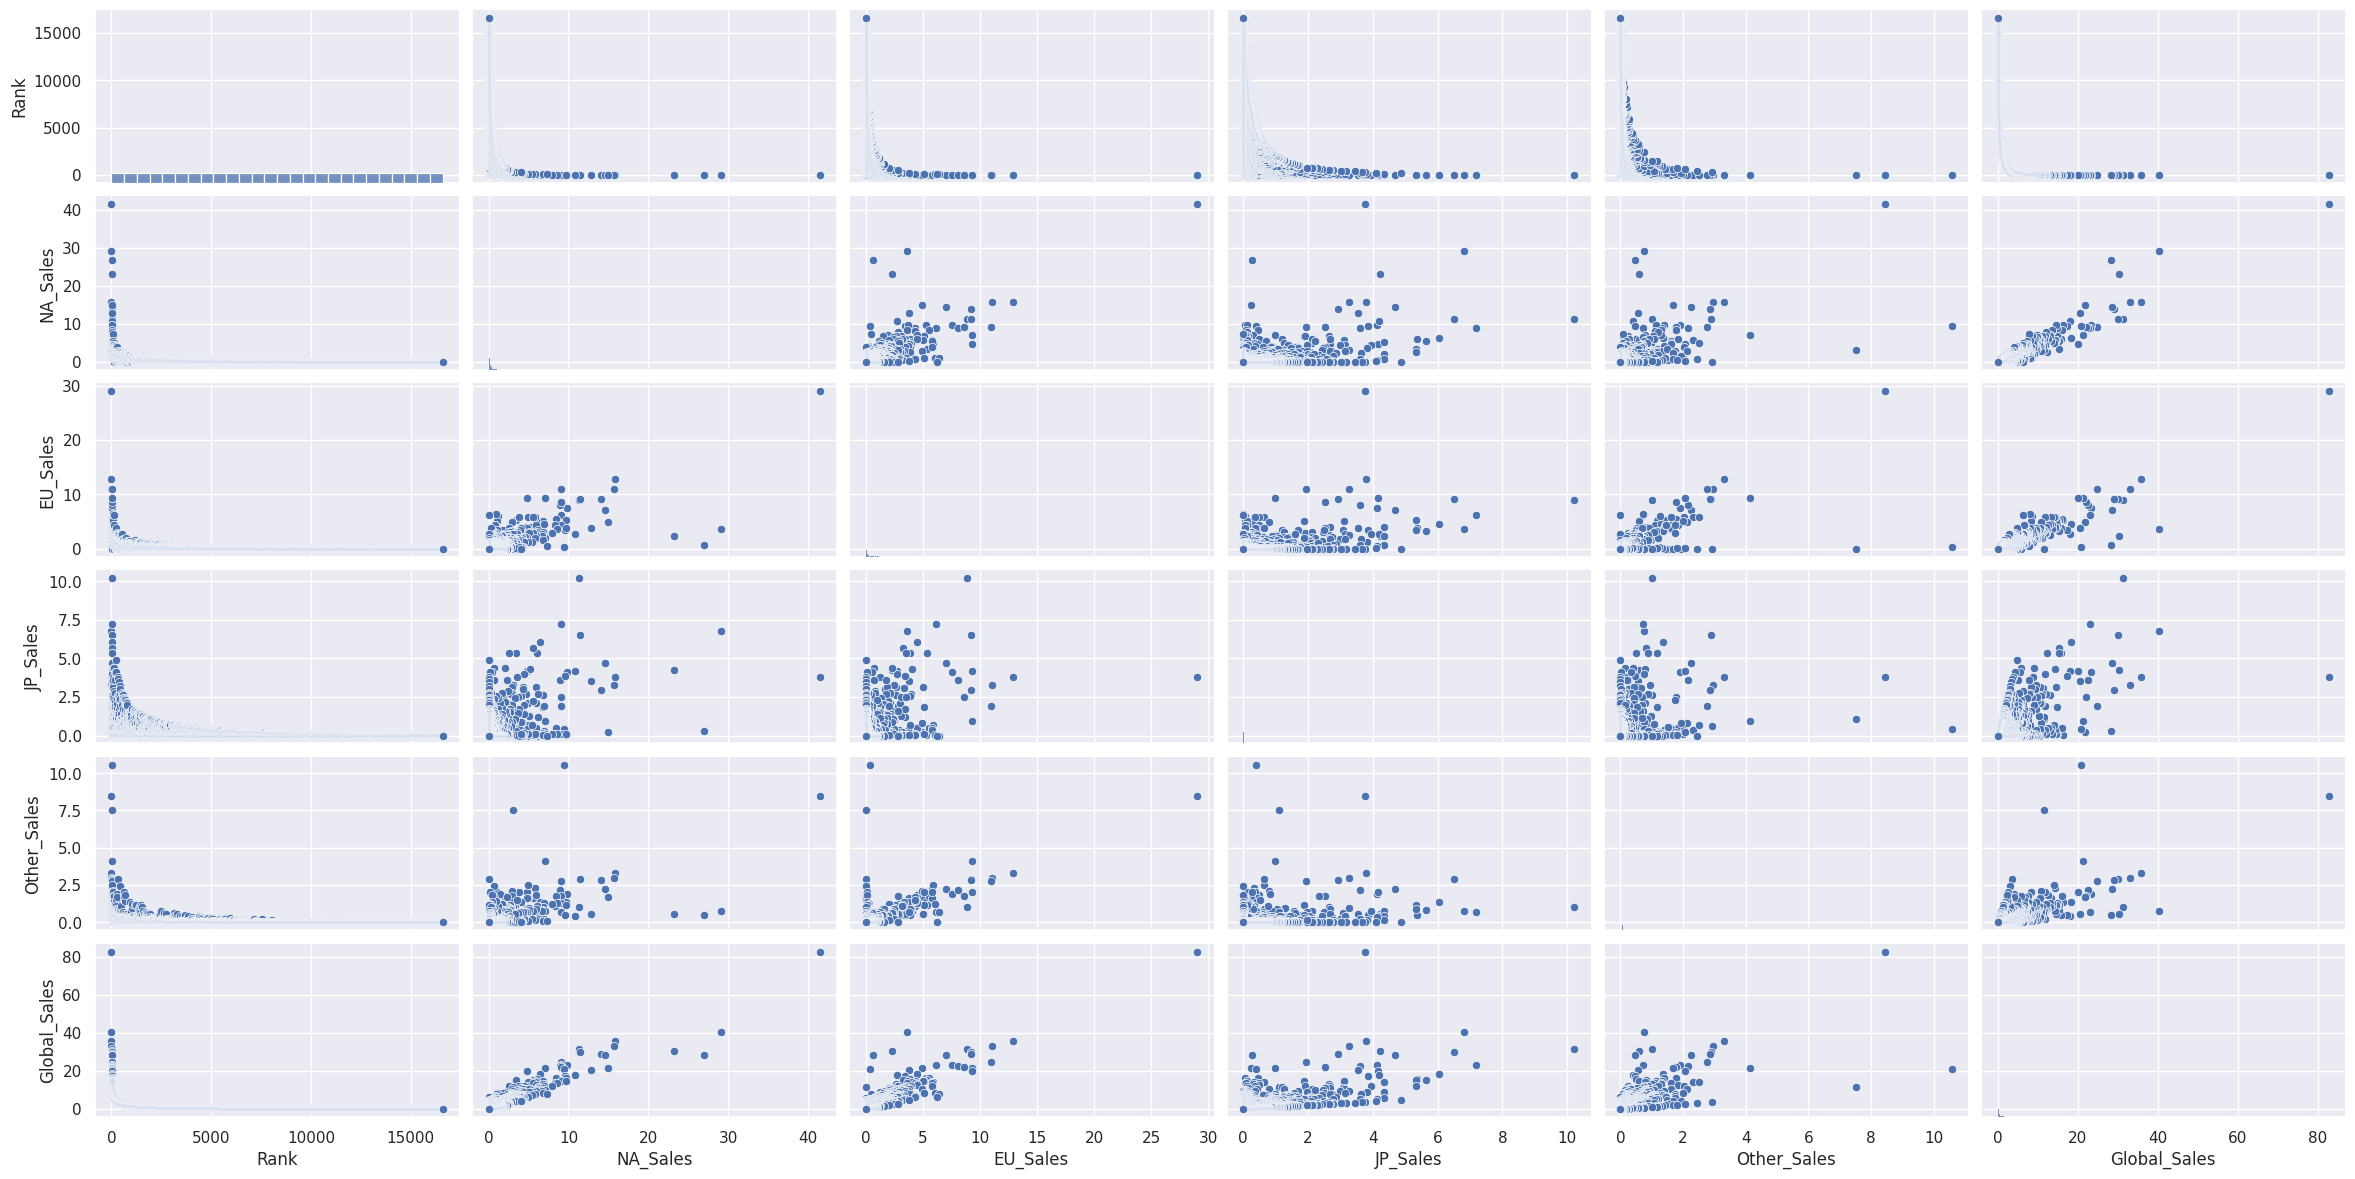

In [45]:
### Analizando datos numéricos ###
# a mayor ranking, mayores ventas, es algo directo y natural -- las ventas globales coinciden con las ventas regionales
cols = ['Rank', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
cols1 = ['Rank', 'NA_Sales', 'Global_Sales']
cols3 = ['Rank', 'Platform', 'Genre', 'Publisher', 'Global_Sales']
sns.set()
sns.pairplot(df[cols], height= 2, aspect = 2)

### **Los análisis aquí se hacen evidentes y además es el comportamiento natural, dado que en todos los casos el ranking de un juego es directamente proporcional al número de copias vendidas. También es evidente que el número de copias vendidas a nivel global es directamente proporcional al número de copias vendidas a nivel de regiones y/o paises. Hay una pequeña excepcion con Japón, en el cual se puede notar una mayor cantidad de copias vendidas respecto a otras regiones y a nivel global.**

In [52]:
### Limpieza de datos, solución a datos faltantes ###
#df.Year.fillna(df.Year.mean(), inplace=True)
dfn = df.dropna()
#dn = dn[[i for i in dn.columns if df[i].dtype!=object]]
print ("Dimensiones de dataframe original: ", df.shape)
print ("Dimensiones de dataframe nuevo: ",  dfn.shape)
#dlr = dn.copy()
#aux = df["Year"].copy()
#aux[aux.isna()] = np.random.normal(loc=np.mean(aux), scale=np.std(aux), size=np.sum(aux.isna()))
#dlr["Year"] = aux
#dlr
dfn

Dimensiones de dataframe original:  (16598, 10)
Dimensiones de dataframe nuevo:  (16291, 10)


,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,,,,
Wii Sports,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
Super Mario Bros.,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
Mario Kart Wii,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
Wii Sports Resort,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
Pokemon Red/Pokemon Blue,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
Woody Woodpecker in Crazy Castle 5,16596,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
Men in Black II: Alien Escape,16597,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
SCORE International Baja 1000: The Official Game,16598,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


### **Debido a la naturaleza de los datos de las columna "Year" y "Publisher" se ha decido borrar las filas que no poseen estos datos ya que no es posible reemplazarlos por valores calculados.**

In [57]:
### Se verifica que no hayan valores faltantes ###
#dlr = dfn.copy()
missing = dfn.isna().sum()
#print(missing, '\n')
missing
#df.dtypes
#df['Year'] = df['Year'].astype(np.int64)
#dfn.dtypes

Rank              int64
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [61]:
### Conversión a tipo de dato entero de la columna "Year" y verificación ###
dfn['Year'] = dfn['Year'].astype(np.int64)
print(dfn.dtypes)
print(dfn['Year'].unique())
len(dfn['Year'].unique())

Rank              int64
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object
[2006 1985 2008 2009 1996 1989 1984 2005 1999 2007 2010 2013 2004 1990
 1988 2002 2001 2011 1998 2015 2012 2014 1992 1997 1993 1994 1982 2003
 1986 2000 1995 2016 1991 1981 1987 1980 1983 2020 2017]


<ipython-input-61-aea469c49dbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['Year'] = dfn['Year'].astype(np.int64)


39

In [69]:
print(dfn['Genre'].unique(), '\n')
print(dfn['Genre'].size, '\n')
print(dfn['Genre'].head(15))
#sns.set()
#sns.distplot(dfn['Genre'])

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy'] 

16291 

Name
Wii Sports                           Sports
Super Mario Bros.                  Platform
Mario Kart Wii                       Racing
Wii Sports Resort                    Sports
Pokemon Red/Pokemon Blue       Role-Playing
Tetris                               Puzzle
New Super Mario Bros.              Platform
Wii Play                               Misc
New Super Mario Bros. Wii          Platform
Duck Hunt                           Shooter
Nintendogs                       Simulation
Mario Kart DS                        Racing
Pokemon Gold/Pokemon Silver    Role-Playing
Wii Fit                              Sports
Wii Fit Plus                         Sports
Name: Genre, dtype: object
